In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# EDA


In [2]:
df = pd.read_csv('BlackFriday_train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [6]:
df.shape

(550068, 12)

##### There are 550068 rows and 12 columns in the raw data.

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### The maximum value of the 'Purchase' is 23961 where as the eman purchase is 9263.96

In [8]:
num_features = [features for features in df.columns if df[features].dtypes != 'O']
cat_features = [features for features in df.columns if df[features].dtypes == 'O']

In [9]:
cat_features

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

### Since User_ID and Product_ID are not important for our analysis, we will drop these columns.

In [10]:
# Drop user id and product id
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

## Checking missing values

In [11]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
Total_missing = df.isnull().sum()
Percent_missing = (df.isnull().sum()/df.shape[0])*100

In [13]:
Percent_missing = Percent_missing[Percent_missing>0]

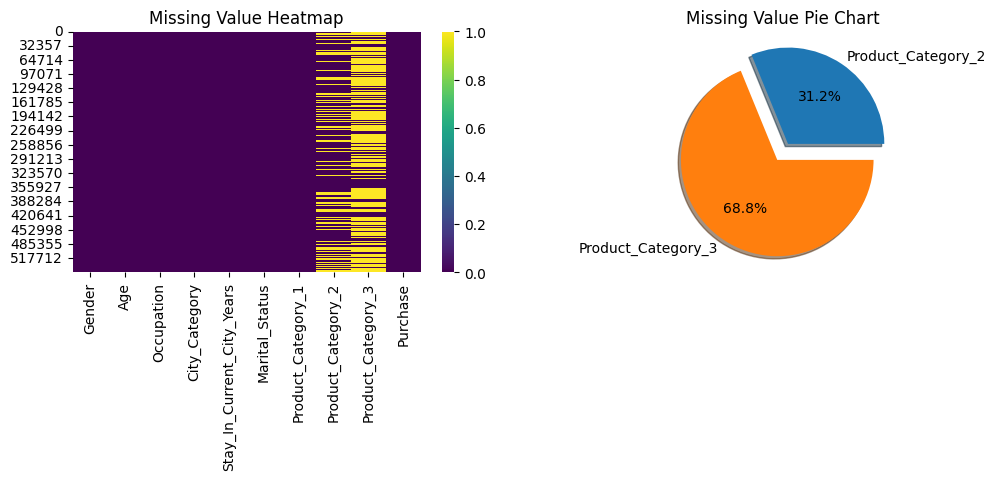

In [14]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.tight_layout()
sns.heatmap(df.isnull(), cmap='viridis', ax=axs[0])

axs[1].pie(Percent_missing, labels=Percent_missing.index, autopct='%1.1f%%', explode = [0.1,0.1], shadow=True)

axs[0].set_title('Missing Value Heatmap')
axs[1].set_title('Missing Value Pie Chart')

plt.show()


### As we can see from above heatmap and piechart, 68.8% of Product Category 2 and 31.2% of Product Category 3 are missing.

## Handling missing values

In [15]:
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [16]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [17]:
 df.groupby('Product_Category_2')['Purchase'].mean()

Product_Category_2
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
Name: Purchase, dtype: float64

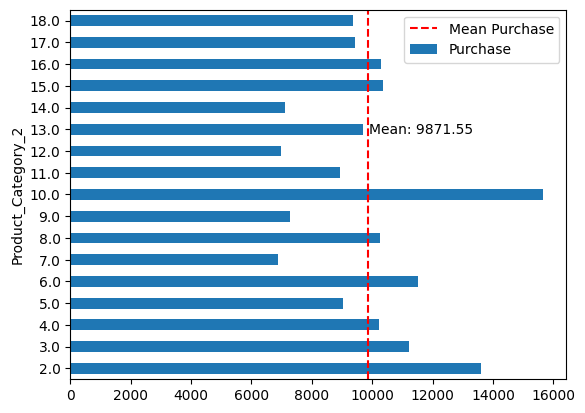

In [18]:

mean_purchase =  df.groupby('Product_Category_2')['Purchase'].mean().mean()

ax = df.groupby('Product_Category_2')['Purchase'].mean().plot(kind='barh')

plt.axvline(x=mean_purchase, color='red', linestyle='--', label='Mean Purchase')

text_shift = 0.001 * ax.get_xlim()[1]  
plt.text(mean_purchase + text_shift, len(df.groupby('Product_Category_2')) - 6, f'Mean: {mean_purchase:.2f}',ha='left', va='center')

ax.legend()

plt.show()


In [19]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [20]:

chi2_result = []
df_selected = df[["Occupation", "Marital_Status", "Product_Category_1", "Product_Category_3", "Purchase"]]

# Create a contingency table for the missingness of Product_Category_2 and User_ID

for feature in df_selected.columns:
    contingency_table = pd.crosstab(df['Product_Category_2'].isnull(), df_selected[feature])

# Perform the chi-square test for independence
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    chi2_result.append({
        'feature': feature,
        'chi2': chi2,
        'p_value': p_value
    })

In [21]:
pd.DataFrame(chi2_result).sort_values(by='p_value', ascending=False)

,feature,chi2,p_value
3,Product_Category_3,0.000000,1.000000e+00
1,Marital_Status,55.086550,1.153375e-13
0,Occupation,865.757119,1.513091e-170
2,Product_Category_1,162003.134259,0.000000e+00
4,Purchase,113706.930599,0.000000e+00


In [22]:
B=df.copy()

In [23]:


df_correlation = B[["Product_Category_2", "Occupation", "Marital_Status", "Product_Category_1", "Product_Category_3", "Purchase"]].copy()
df_correlation["Product_Category_2_Missing"] = df_correlation["Product_Category_2"].isnull().astype(int)

correlations = df_correlation.corr()["Product_Category_2_Missing"]


In [24]:
correlations.sort_values(ascending=False)

Product_Category_2_Missing    1.000000
Product_Category_1            0.435959
Marital_Status                0.010011
Occupation                   -0.009411
Purchase                     -0.235980
Product_Category_2                 NaN
Product_Category_3                 NaN
Name: Product_Category_2_Missing, dtype: float64

In [25]:
A = df.copy()

In [26]:
A['Product_Category_2_Missing'] = A['Product_Category_2'].isnull().astype(int)

In [27]:
A.groupby('Product_Category_2_Missing')[['Occupation', 'Marital_Status', 'Product_Category_1','Purchase']].mean()

,Occupation,Marital_Status,Product_Category_1,Purchase
Product_Category_2_Missing,,,,
0,8.118399,0.406309,4.238793,10069.020833
1,7.986322,0.416902,7.930908,7518.695389


C:\Users\Swamesh\AppData\Local\Temp\ipykernel_13192\1333633793.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  missing_proportions = A.groupby('Product_Category_2_Missing')['Marital_Status', 'Occupation', 'Product_Category_1'].mean()


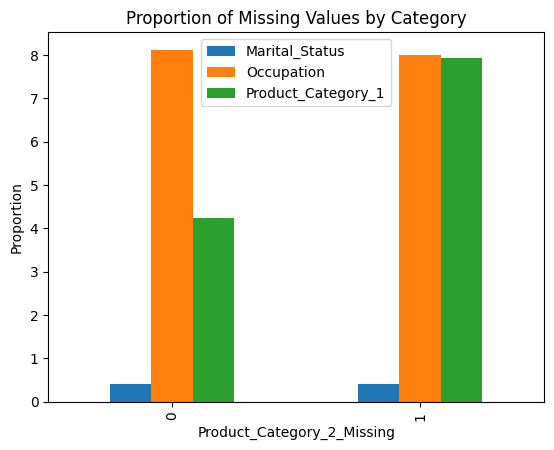

In [28]:
missing_proportions = A.groupby('Product_Category_2_Missing')['Marital_Status', 'Occupation', 'Product_Category_1'].mean()

# Create a bar plot
missing_proportions.plot(kind='bar')
plt.xlabel('Product_Category_2_Missing')
plt.ylabel('Proportion')
plt.title('Proportion of Missing Values by Category')
plt.show()

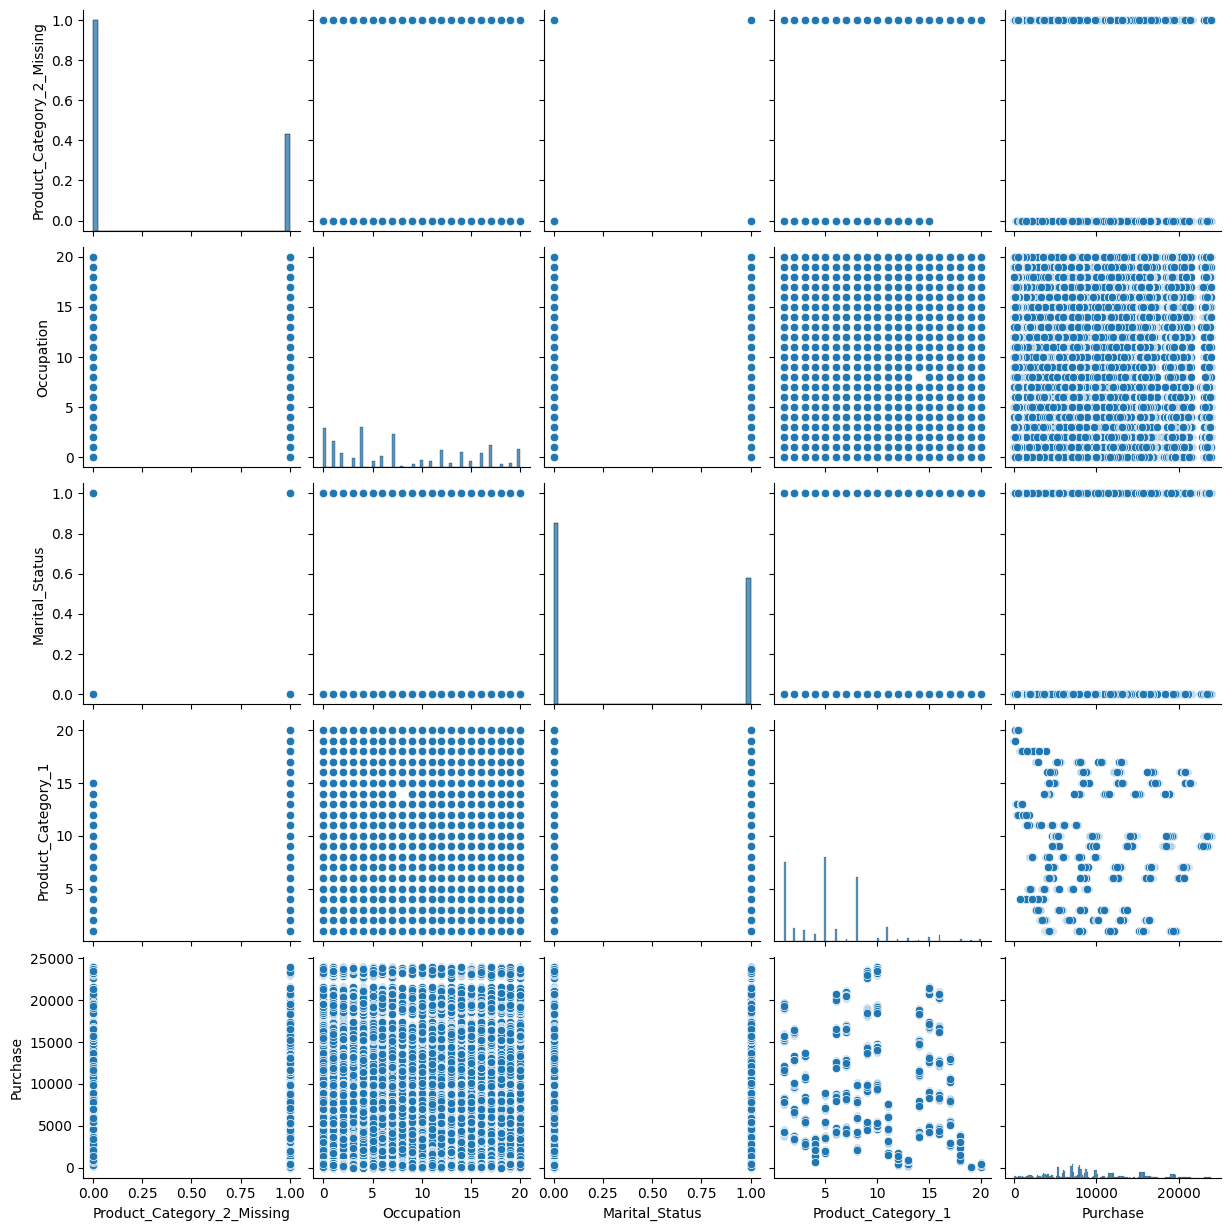

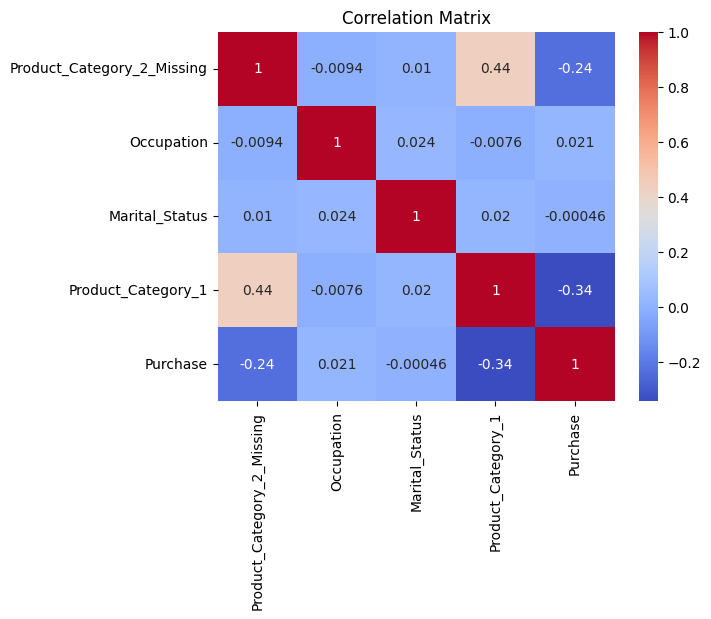

In [29]:
variables_of_interest = ['Product_Category_2_Missing', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']

# Create a pairplot to visualize the relationships
sns.pairplot(A[variables_of_interest], kind='scatter')
plt.show()

# Calculate correlation coefficients
correlation_matrix = A[variables_of_interest].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
correlation_matrix

,Product_Category_2_Missing,Occupation,Marital_Status,Product_Category_1,Purchase
Product_Category_2_Missing,1.000000,-0.009411,0.010011,0.435959,-0.235980
Occupation,-0.009411,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.010011,0.024280,1.000000,0.019888,-0.000463
Product_Category_1,0.435959,-0.007618,0.019888,1.000000,-0.343703
Purchase,-0.235980,0.020833,-0.000463,-0.343703,1.000000


In [31]:
A

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_Missing
0,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,F,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368,1
550064,F,26-35,1,C,3,0,20,NaN,NaN,371,1
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137,1
550066,F,55+,1,C,2,0,20,NaN,NaN,365,1


In [32]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer, KNNImputer

# # MICE imputation
# mice_imputer = IterativeImputer()
# A_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(A))

# # KNN imputation
# knn_imputer = KNNImputer()
# A_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(A))

# # Replace the missing values in the original dataframe with the imputed values
# A['Product_Category_2_MICE'] = A_mice_imputed[:, column_index]
# A['Product_Category_2_KNN'] = A_knn_imputed[:, column_index]


## Checking the relation of Mean purchase per product and Product Frequency

In [33]:
df1 = pd.read_csv('BlackFriday_train.csv')

In [34]:
df1['Product_ID'].unique().shape

(3631,)

In [35]:
mean_purchase_per_product = df1.groupby('Product_ID')['Purchase'].mean().sort_values(ascending=False).round(2)
mean_purchase_per_product

Product_ID
P00086242    21256.51
P00085342    20980.27
P00200642    20468.77
P00116142    20463.79
P00119342    20448.76
               ...   
P00372445      374.93
P00375436      374.27
P00371644      362.91
P00370853       37.39
P00370293       36.68
Name: Purchase, Length: 3631, dtype: float64

In [36]:
product_frequency = df1['Product_ID'].value_counts()
product_frequency


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

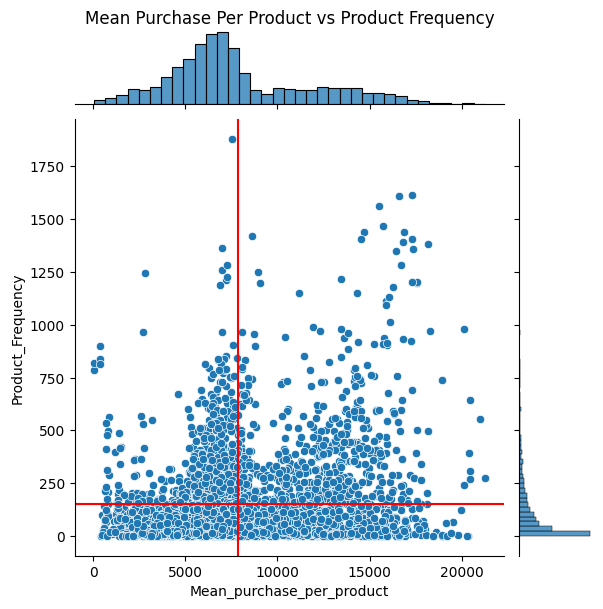

In [37]:

ax = sns.jointplot(x=mean_purchase_per_product, y=product_frequency, alpha=1)

ax1 = ax.ax_joint

ax1.axhline(product_frequency.mean(), color='red', linestyle='-', label='Mean Purchase')
ax1.axvline(mean_purchase_per_product.mean(), color='red', linestyle='-', label='Product Frequency')



plt.xlabel('Mean_purchase_per_product')
plt.ylabel('Product_Frequency')
plt.title('Mean Purchase Per Product vs Product Frequency',x=0.5,y=1.2)
plt.show()

In [38]:
# Create a dataframe for product frequency
df_frequency = pd.DataFrame({'Product_ID': product_frequency.index, 'Frequency': product_frequency.values})

# Create a dataframe for mean purchase per product
df_mean_purchase = pd.DataFrame({'Product_ID': mean_purchase_per_product.index, 'Mean_Purchase': mean_purchase_per_product.values})

# Merge the dataframes based on Product_ID
df_merged = pd.merge(df_frequency, df_mean_purchase, on='Product_ID')




## Based on the jointplot above, we can group the products into 4 categories LFLP,LFHP, HFLP and HFHP
####  LF_LP': 'Low Frequency Low Purchase',
#### LF_HP' : 'Low Frequency High Purchase',
#### HF_LP': 'High Frequency Low Purchase',
#### HF_HP' : 'High Frequency High Purchase'

In [39]:
def Frequency_Purchase_Labeling(df):
    if df['Frequency'] <= 250 and df['Mean_Purchase'] <= 8000.00:
        return 'LF_LP'
    elif df['Frequency'] <= 250 and df['Mean_Purchase'] >= 8000.00:
        return 'LF_HP'
    elif df['Frequency'] >= 250 and df['Mean_Purchase'] <= 8000.00:
        return 'HF_LP'
    elif df['Frequency'] >= 250 and df['Mean_Purchase'] >= 8000.00:
        return 'HF_HP'

df_merged['Product_Popularity'] = df_merged.apply(Frequency_Purchase_Labeling, axis=1)


#### AS YOU CAN SEE, COUNT OF PRODUCTS THAT ARE BOUGHT LESS FREQUENT AND HAVE LESS PURHASE IS THE MOST

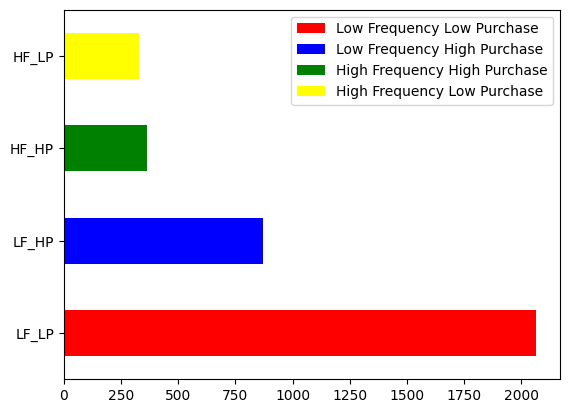

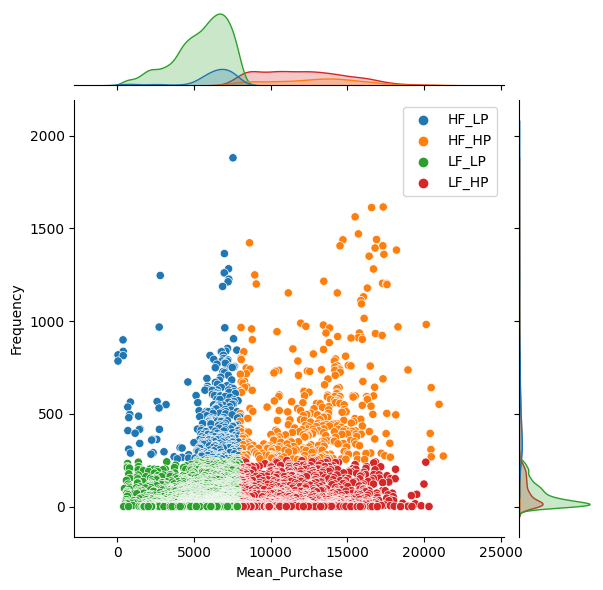

In [40]:
ax = df_merged['Product_Popularity'].value_counts().plot(kind='barh', color=['red', 'blue', 'green', 'yellow'])

# Create the second plot
sns.jointplot(data=df_merged, x='Mean_Purchase', y='Frequency', alpha=1, hue='Product_Popularity')

# Add a legend to the first plot
legend_labels = {
    'LF_LP': 'Low Frequency Low Purchase',
    'LF_HP': 'Low Frequency High Purchase',
    'HF_LP': 'High Frequency Low Purchase',
    'HF_HP': 'High Frequency High Purchase'
}

labels = [legend_labels[label.get_text()] for label in ax.get_yticklabels()]

ax.legend(ax.patches, labels)

# Add a legend to the second plot
plt.legend(loc='upper right')

# Show the plots
plt.show()

### Mapping the Product Popularity values in original dataframe df1. We can then drop Product_ID and User_ID

In [41]:
popularity_dict = df_merged.set_index('Product_ID')['Product_Popularity'].to_dict()

In [50]:
df1['Product_Popularity'] = df1['Product_ID'].map(popularity_dict)

In [51]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Popularity
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,LF_HP
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,HF_HP
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,LF_LP
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,HF_LP
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,LF_LP
